In [80]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import re
import time
from selenium.webdriver.common.by import By
from selenium import webdriver
from selenium.webdriver import Chrome

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
import time
import mysql.connector

In [81]:
# pull data from db, put in df 
mydb = mysql.connector.connect(
  host="database-1.cxi86tamokep.us-east-1.rds.amazonaws.com",
  user="admin",
  password="Pfm04R&h#B^A",
    database="BookClubDB"
)

mycursor = mydb.cursor()

In [82]:
sql = "SELECT * FROM books"
booksdf = pd.read_sql(sql, mydb)

In [83]:
booksdf

start_date    end_date           isbn                             title  \
0  2023-04-02  2023-05-07  9780525559757                             Bunny   
1  2022-12-03  2023-02-07  9781408726600                            Verity   
2  2023-02-05  2023-04-02  9781474605731              Flowers for Algernon   
3  2023-05-07  2023-06-17  9781529366587  Last night at the Telegraph club   
4  2023-02-12  2023-02-05  9781580059176                      Becoming Eve   
5  2023-02-07  2023-02-12  9781941040478                   Turkish Delight   

             author gender         origin  pages  year             genre  \
0         Mona Awad      F         Canada    336  2020            Horror   
1    Colleen Hoover      F  United States    336  2022  Mystery Thriller   
2      Daniel Keyes      M  United States    216  1959   Science Fiction   
3        Malinda Lo      F  United States    416  2021       Young Adult   
4  Abby Chava Stein      F  United States    272  2019         Biography   
5       Jan Wolkers      M    Netherlands    240  1969      Cult classic   

  fiction_nonfiction  goodreads_rating  \
0            Fiction              7.12   
1            Fiction              8.76   
2            Fiction              8.38   
3            Fiction              8.50   
4        Non-Fiction              8.20   
5            Fiction              7.20   

                                              images goodreads_code  \
0  http://books.google.com/books/content?id=EqVPE...       42815544   
1  http://books.google.com/books/content?id=0TbUz...       59344312   
2  http://books.google.com/books/content?id=VbOtA...       36576608   
3  http://books.google.com/books/content?id=qmTyz...       35224992   
4  http://books.google.com/books/content?id=_tSOD...       61170849   
5  http://books.google.com/books/content?id=nCaRE...       30304220   

                   googleCat  \
0                    Fiction   
1           Suspense fiction   
2                      Brain   
3                   Cold War   
4  Biography & Autobiography   
5                    Fiction   

                                         textSnippet  
0  The spellbinding new novel from one of our mos...  
1  Rebecca meets Gone Girl in this shocking, unpr...  
2  &#39;A masterpiece of poignant brilliance . . ...  
3  WINNER OF THE NATIONAL BOOK AWARD FOR YOUNG AD...  
4  Powerful in the truths it reveals about biolog...  
5  The story of a tempestuous love affair—and the...

In [108]:
options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito')
options.add_argument('--headless')
driver = webdriver.Chrome("/usr/lib/chromium-browser/chromedriver", chrome_options=options)


/var/folders/n4/bvfwb70n22b9hslwkhrtj1k00000gn/T/ipykernel_81871/2691523480.py:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("/usr/lib/chromium-browser/chromedriver", chrome_options=options)
/var/folders/n4/bvfwb70n22b9hslwkhrtj1k00000gn/T/ipykernel_81871/2691523480.py:5: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome("/usr/lib/chromium-browser/chromedriver", chrome_options=options)


In [109]:


driver.get("https://www.goodreads.com/book/show/59344312/reviews")




delay = 10 # seconds
try:
    myElem = WebDriverWait(driver, delay).until(EC.presence_of_element_located((By.CLASS_NAME, 'ReviewText__content')))
    
    print("Page is ready!")
except TimeoutException:
    print("Loading took too much time!")


Page is ready!


In [110]:
while True:
    try:
        time.sleep(10)
        
        WebDriverWait(driver, delay).until(
            EC.element_to_be_clickable(
                (By.XPATH, "//*[text()='Show more reviews']/ancestor::button[1]")
            )
        ).click()
        print("Tried clicking")
        
    except:
        try:
            driver.execute_script("""
               var l = document.getElementsByClassName("Overlay")[0];
               l.parentNode.removeChild(l);
            """)
        except:
            print("No overlay to delete")

        time.sleep(10)
        
        try:
            WebDriverWait(driver, delay).until(
                EC.element_to_be_clickable(
                    (By.XPATH, "//*[text()='Show more reviews']/ancestor::button[1]")
                )
            ).click()
            print("Tried clicking again")
        except TimeoutException:
            print("Timed out looking for Show more reviews button")
            break;
        



Tried clicking
No overlay to delete
Tried clicking again
No overlay to delete
Tried clicking again
No overlay to delete
Tried clicking again
No overlay to delete
Tried clicking again
No overlay to delete
Tried clicking again
No overlay to delete


ElementClickInterceptedException: Message: element click intercepted: Element is not clickable at point (526, 695)
  (Session info: headless chrome=114.0.5735.90)
Stacktrace:
0   chromedriver                        0x0000000104b13f48 chromedriver + 4226888
1   chromedriver                        0x0000000104b0c4f4 chromedriver + 4195572
2   chromedriver                        0x0000000104750d68 chromedriver + 281960
3   chromedriver                        0x00000001047926e8 chromedriver + 550632
4   chromedriver                        0x0000000104790638 chromedriver + 542264
5   chromedriver                        0x000000010478e548 chromedriver + 533832
6   chromedriver                        0x000000010478d918 chromedriver + 530712
7   chromedriver                        0x0000000104781eec chromedriver + 483052
8   chromedriver                        0x0000000104781734 chromedriver + 481076
9   chromedriver                        0x00000001047c2c58 chromedriver + 748632
10  chromedriver                        0x000000010477ff1c chromedriver + 474908
11  chromedriver                        0x0000000104780ef4 chromedriver + 478964
12  chromedriver                        0x0000000104ad559c chromedriver + 3970460
13  chromedriver                        0x0000000104ad96f0 chromedriver + 3987184
14  chromedriver                        0x0000000104adf5b4 chromedriver + 4011444
15  chromedriver                        0x0000000104ada2fc chromedriver + 3990268
16  chromedriver                        0x0000000104ab21c0 chromedriver + 3826112
17  chromedriver                        0x0000000104af6088 chromedriver + 4104328
18  chromedriver                        0x0000000104af61e0 chromedriver + 4104672
19  chromedriver                        0x0000000104b05f28 chromedriver + 4169512
20  libsystem_pthread.dylib             0x00000001adf3606c _pthread_start + 148
21  libsystem_pthread.dylib             0x00000001adf30e2c thread_start + 8


In [111]:
texts = driver.find_elements(By.CLASS_NAME, "ReviewText__content")

print(len(texts))


210


In [58]:
type(texts)

list

In [112]:
with open("Verity.txt", "w") as output:
    output.write(str(texts))

In [113]:
my_file = open("Verity.txt", "r")
data = my_file.read()
  
# replacing end of line('/n') with ' ' and
# splitting the text it further when '.' is seen.
data_into_list = data.replace('\n', ' ').split("<")

In [114]:
data_into_list

['[',
 'selenium.webdriver.remote.webelement.WebElement (session="7e1f95d4339001aece09a0cf1cb104b7", element="131CE1E59D5E90C8931641C0222C2DF9_element_48")>, ',
 'selenium.webdriver.remote.webelement.WebElement (session="7e1f95d4339001aece09a0cf1cb104b7", element="131CE1E59D5E90C8931641C0222C2DF9_element_78")>, ',
 'selenium.webdriver.remote.webelement.WebElement (session="7e1f95d4339001aece09a0cf1cb104b7", element="131CE1E59D5E90C8931641C0222C2DF9_element_79")>, ',
 'selenium.webdriver.remote.webelement.WebElement (session="7e1f95d4339001aece09a0cf1cb104b7", element="131CE1E59D5E90C8931641C0222C2DF9_element_80")>, ',
 'selenium.webdriver.remote.webelement.WebElement (session="7e1f95d4339001aece09a0cf1cb104b7", element="131CE1E59D5E90C8931641C0222C2DF9_element_81")>, ',
 'selenium.webdriver.remote.webelement.WebElement (session="7e1f95d4339001aece09a0cf1cb104b7", element="131CE1E59D5E90C8931641C0222C2DF9_element_82")>, ',
 'selenium.webdriver.remote.webelement.WebElement (session="7e1f

In [115]:
import re
# as per recommendation from @freylis, compile once only
CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
    cleantext = re.sub(CLEANR, '', raw_html)
    cleantext = re.sub('Show more', ' ', cleantext)
    return cleantext

In [116]:
reviews = '' 

for i in texts:
    text = cleanhtml(i.get_attribute('innerHTML'))
    text = text + " "
    reviews += str(text)

In [117]:
reviews

'2.5 stars?This was straight-up hilarious. The funniest creepy book ever written. Did I hear that people cried while reading this? I sure hope it was tears of laughter (or pain) because y\'all need to explain.🛑SPOILERS🛑 So I got a real important question here.....how is it that main characters always read about the most pressing issues so damn slow? Like are you actually about to tell me this woman, this author, read one chapter of the manuscript per a ....day? She took WEEKS to read 19 bloody chapters. I would binge that shit in an hour. Hell, I bet even Jeremy read it in 3 seconds. But she took her sweet time like the annoying little vermin she is. Immediately I want to express just how much the heroine ruined this whole book for me. Reading from her POV was like taking a knife, exposing every nerve in my body, and pouring vinegar all over them. To be truthful I don\'t even remember her name. Every time it was spelt out, I read it, then instantly like my brain knows self-preservation

In [120]:
# backup 
with open("Verity.txt", "w") as output:
    output.write(str(reviews))

In [121]:
translatedReviews = ''
x = nltk.tokenize.sent_tokenize(reviews)
for sentence in x:
    translated = GoogleTranslator(source='auto', target='english').translate(sentence)
    translated = translated + " "
    translatedReviews += str(translated)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'str'

In [123]:
translatedReviews 

'2.5 stars?This was straight-up hilarious. The funniest creepy book ever written. Did I hear that people cried while reading this? I sure hope it was tears of laughter (or pain) because y\'all need to explain.🛑SPOILERS🛑 So I got a real important question here.....how is it that main characters always read about the most pressing issues so damn slow? Like are you actually about to tell me this woman, this author, read one chapter of the manuscript per a ....day? She took WEEKS to read 19 bloody chapters. I would binge that shit in an hour. Hell, I bet even Jeremy read it in 3 seconds. But she took her sweet time like the annoying little vermin she is. Immediately I want to express just how much the heroine ruined this whole book for me. Reading from her POV was like taking a knife, exposing every nerve in my body, and pouring vinegar all over them. To be truthful I don\'t even remember her name. Every time it was spelt out, I read it, then instantly like my brain knows self-preservation

In [124]:
# backup 
with open("VerityTranslated.txt", "w") as output:
    output.write(str(translatedReviews))

In [ ]:
import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt 
from deep_translator import GoogleTranslator
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

In [125]:
# Remove stopwords
text_tokens = word_tokenize(translatedReviews)

tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

filtered_reviews = (" ").join(tokens_without_sw)
print(filtered_reviews)

2.5 stars ? This straight-up hilarious . The funniest creepy book written . Did I hear cried reading ? I hope tears laughter ( pain ) y'all explain.🛑SPOILERS🛑 So I real important question ..... characters read pressing issues damn slow ? Like woman , author , read chapter manuscript .... day ? She WEEKS read 19 bloody chapters . I binge shit hour . Hell , I bet Jeremy read 3 seconds . But sweet time annoying vermin . Immediately I express heroine ruined book . Reading POV taking knife , exposing nerve body , pouring vinegar . To truthful I n't remember . Every time spelt , I read , instantly brain self-preservation , erases letters I . Loren ? Mulan ? Rowan ? No clue . She thirsting Jeremy , shoving nose Verity 's business , gatekeeping learned hero . I I guess wife kill children million times sick obsession ...... n't concern love , put manuscript🙂It drove CRAZY time Lemon finished chapter put cents . Oh 's evil😢 , 's callous🙄 , 's horrible😩 . shut fuck , nosy , home-wrecking ass bitc

In [126]:
# backup 
with open("VerityFiltered.txt", "w") as output:
    output.write(str(filtered_reviews))

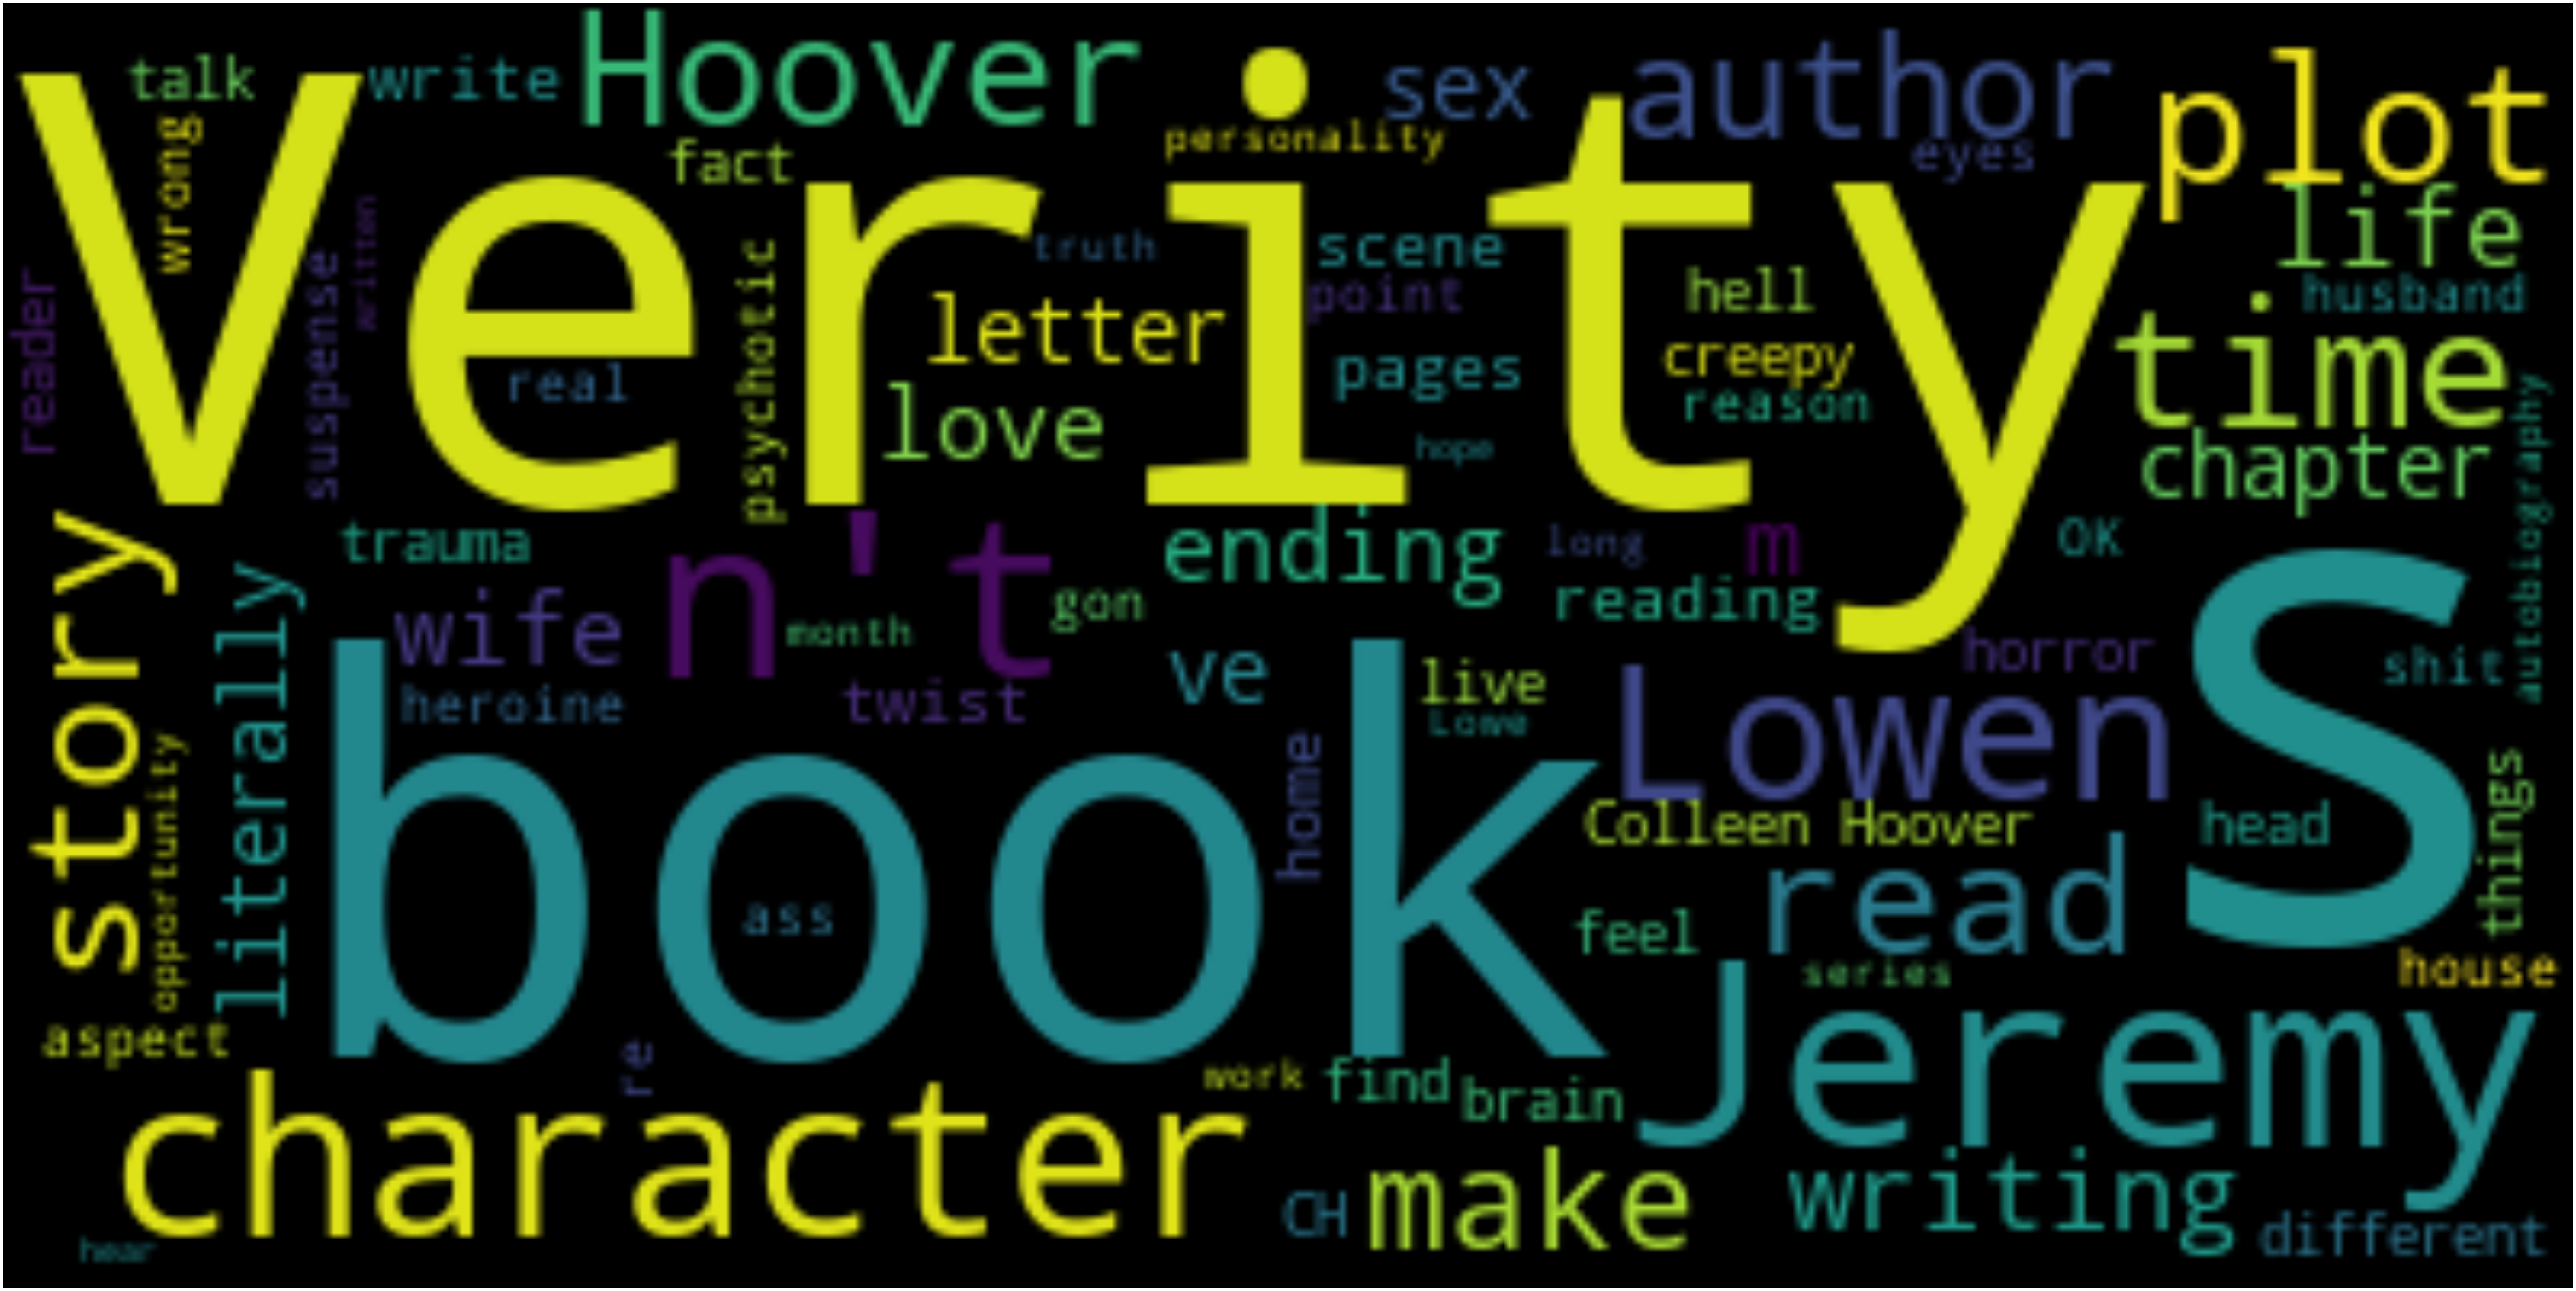

In [127]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color ='rgba(0,0,0,0)', max_words=75, stopwords=STOPWORDS).generate(filtered_reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.rcParams['figure.figsize'] = [100, 100]
plt.savefig('Verity.png')
plt.show()
